In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
DATA_DIR = Path('../data')
df = pd.read_csv(DATA_DIR/'accidents.csv')
df.describe()
import sys
sys.path.append('..')
from src.data import load_data, convert_to_bool, convert_to_ordinal


In [12]:
cars_df = load_data('ToyotaCorolla', index_col='Id')
cars_df.drop(columns='Model',inplace=True)
X = cars_df.drop(columns='Price')
y = cars_df['Price']
cars_df

/workspaces/AdvPythonML/data/ToyotaCorolla.csv


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,13500,23,10,2002,46986,Diesel,90,1,Blue,0,...,1,1,0,0,0,1,0,0,0,0
2,13750,23,10,2002,72937,Diesel,90,1,Silver,0,...,0,1,0,0,0,1,0,0,0,0
3,13950,24,9,2002,41711,Diesel,90,1,Blue,0,...,0,1,0,0,0,1,0,0,0,0
4,14950,26,7,2002,48000,Diesel,90,0,Black,0,...,0,1,0,0,0,1,0,0,0,0
5,13750,30,3,2002,38500,Diesel,90,0,Black,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,7500,69,12,1998,20544,Petrol,86,1,Blue,0,...,1,1,0,1,1,1,0,0,0,0
1439,10845,72,9,1998,19000,Petrol,86,0,Grey,0,...,0,1,0,0,1,1,0,0,0,0
1440,8500,71,10,1998,17016,Petrol,86,0,Blue,0,...,0,1,0,0,0,1,0,0,0,0


In [13]:
cars_df = convert_to_bool(cars_df,['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'])

ord_columns = ['Mfg_Month', 'Mfg_Year','Doors', 'Cylinders', 'Gears','Fuel_Type']

cars_df = convert_to_ordinal(cars_df,ord_columns)

In [14]:
cars_df.dtypes

Price                   int64
Age_08_04               int64
Mfg_Month            category
Mfg_Year             category
KM                      int64
Fuel_Type            category
HP                      int64
Met_Color             boolean
Color                  object
Automatic             boolean
CC                      int64
Doors                category
Cylinders            category
Gears                category
Quarterly_Tax           int64
Weight                  int64
Mfr_Guarantee         boolean
BOVAG_Guarantee       boolean
Guarantee_Period        int64
ABS                   boolean
Airbag_1              boolean
Airbag_2              boolean
Airco                 boolean
Automatic_airco       boolean
Boardcomputer         boolean
CD_Player             boolean
Central_Lock          boolean
Powered_Windows       boolean
Power_Steering        boolean
Radio                 boolean
Mistlamps             boolean
Sport_Model           boolean
Backseat_Divider      boolean
Metallic_R

In [48]:
#Just a little piece of code to get the boolean columns - ignore
df = pd.DataFrame(cars_df.max()==1, columns=['IsBool'])   
df[df.IsBool].index

# And a bit of code to find the likely ordinal masqurading as numbers
cars_df.select_dtypes(include='number', exclude='bool').columns

Index(['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [7]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from src.feature_selection import FeatureImportance


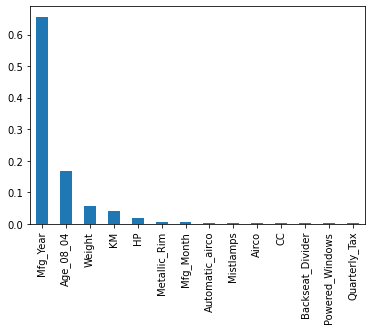

In [24]:
dtr = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)
cat_col = X_train.select_dtypes(include=['object','category']).columns
bool_cols = X_train.select_dtypes(include='bool').columns
num_cols = X_train.select_dtypes(include=np.number).columns

pre_processing = ColumnTransformer([('cat_encoder', OneHotEncoder(), cat_col),('num_encoder', StandardScaler(),num_cols)])

pipe = Pipeline([("pp",pre_processing), ("dtr",dtr)])
pipe.fit(X_train,y_train)
fi= FeatureImportance(pipe)
fi.get_feature_names()
fi.get_feature_importance().sort_values(ascending=False)[:14].plot(kind='bar')
top_10_tree = fi.get_feature_importance().sort_values(ascending=False)[:10]
top_10_tree.name='top_10_tree'


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py", line 564, in transform
    Xs = self._fit_transform(X, None, _transform_one, fi

['Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Color_Beige', 'Color_Black', 'Color_Blue', 'Color_Green', 'Color_Grey', 'Color_Red', 'Color_Silver', 'Color_Violet', 'Color_White', 'Color_Yellow', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']


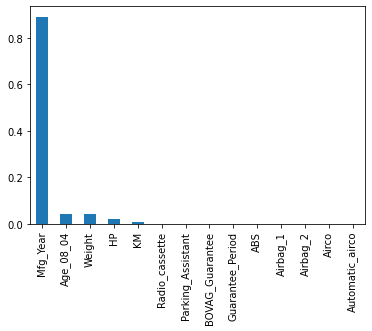

In [28]:
param_grid = {'regressor__max_depth': [3,4,5]}
dtr = DecisionTreeRegressor()

pipe = Pipeline([("pp",pre_processing), ("regressor",dtr)])
reg = GridSearchCV(pipe,param_grid=param_grid)
reg.fit(X_train, y_train)
best= reg.best_estimator_
fi= FeatureImportance(best)
print(fi.get_feature_names())
fi.get_feature_importance().sort_values(ascending=False)[:14].plot(kind='bar')
top_10_grid = fi.get_feature_importance().sort_values(ascending=False)[:10]
top_10_grid.name='top_10_grid'

In [29]:
pd.DataFrame(top_10_grid).join(top_10_tree)


,top_10_grid,top_10_tree
Mfg_Year,0.891639,0.656006
Age_08_04,0.041376,0.167200
Weight,0.041167,0.056574
HP,0.019945,0.018955
KM,0.005872,0.042137
Radio_cassette,0.000000,NaN
Parking_Assistant,0.000000,NaN
BOVAG_Guarantee,0.000000,NaN
Guarantee_Period,0.000000,NaN
ABS,0.000000,NaN


In [ ]:
#reg.best_params_
reg.cv_results_

In [ ]:

fi = FeatureImportance(reg.best_estimator_)
fi.get_feature_importance()
print(reg.best_estimator_,fi.get_feature_names())
# fi.discarded_features